# Neural Network Classifier - Breat Cancer

In [1]:
import pandas as pd
from sklearn import datasets


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [3]:
# General config of pandas
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option('display.expand_frame_repr', False)


In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

cancer = datasets.load_breast_cancer()

# Retrieving features from the datasets
print(f"Features: {cancer.feature_names}\n")
print(f"Target: {cancer.target_names}")


Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target: ['malignant' 'benign']


### Creating the pandas dataframe

In [7]:
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df["target"] = cancer.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Scaler
We should scale the features becuase it will help the NN to find the patterns easily, it is a best practice in terms of NN.

Because all the features are cuantitative, We can scale them all with the standard scaler function in Python.

In [11]:
# Selecting the columns to scale
columns_to_scale = cancer.feature_names

# Instantiating the scaler
scaler = StandardScaler()

# Converting the distribuion of each feature to mean=0 and std=1
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Checking the first 5 records of the data after scaling
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


In [12]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,-9.740305e-16,-9.084707e-16,1.860648e-15,-7.679856e-16,-7.352057e-16,-3.996022e-16,8.553985e-16,-2.684828e-16,-3.371644e-16,-3.059455e-16,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15,0.627417
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,0.483918
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,-1.059924e+00,-1.554264e+00,-1.044049e+00,-7.378291e-01,-1.776065e+00,-1.298098e+00,-1.057501e+00,-1.913447e+00,-1.532890e+00,-1.096968e+00,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00,0.000000
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,-6.235706e-01,-6.948092e-01,-6.237679e-01,-4.947542e-01,-6.240183e-01,-6.929263e-01,-5.571612e-01,-6.744900e-01,-6.516807e-01,-5.851185e-01,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01,0.000000
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,-2.922452e-01,-1.974976e-01,-2.866520e-01,-3.477828e-01,-2.203352e-01,-2.810204e-01,-1.990654e-01,-1.404958e-01,-2.194304e-01,-2.299405e-01,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01,1.000000
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,2.660996e-01,4.665523e-01,2.430307e-01,1.067726e-01,3.683553e-01,3.896541e-01,3.367521e-01,4.726567e-01,3.556925e-01,2.886421e-01,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01,1.000000
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,8.906909e+00,6.655279e+00,9.461986e+00,1.104184e+01,8.029999e+00,6.143482e+00,1.207268e+01,6.649601e+00,7.071917e+00,9.851593e+00,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00,1.000000


# Data Split

In [13]:
X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train features shape: {X_train.shape}, Train target shape: {y_train.shape}")
print(f"Test features shape: {X_test.shape}, Test target shape: {y_test.shape}")

Train features shape: (398, 30), Train target shape: (398,)
Test features shape: (171, 30), Test target shape: (171,)


# Training Phase

In [36]:
# Instantiating the MLP model

model = MLPClassifier(random_state=42,
                     max_iter=1000,
                     hidden_layer_sizes=(20,10),
                     n_iter_no_change=100,
                     early_stopping=True,
                     verbose=True)
# this model has two hidden layers in the neural network’s design, each with 20 and 10 neurons

# Fitting the model for training
model.fit(X_train, y_train)

Iteration 1, loss = 0.93341969
Validation score: 0.375000
Iteration 2, loss = 0.90785185
Validation score: 0.375000
Iteration 3, loss = 0.88357707
Validation score: 0.375000
Iteration 4, loss = 0.86017165
Validation score: 0.375000
Iteration 5, loss = 0.83719611
Validation score: 0.375000
Iteration 6, loss = 0.81579788
Validation score: 0.375000
Iteration 7, loss = 0.79470435
Validation score: 0.375000
Iteration 8, loss = 0.77432628
Validation score: 0.375000
Iteration 9, loss = 0.75479817
Validation score: 0.400000
Iteration 10, loss = 0.73538193
Validation score: 0.425000
Iteration 11, loss = 0.71743546
Validation score: 0.450000
Iteration 12, loss = 0.69873382
Validation score: 0.500000
Iteration 13, loss = 0.68080219
Validation score: 0.575000
Iteration 14, loss = 0.66250487
Validation score: 0.625000
Iteration 15, loss = 0.64506955
Validation score: 0.650000
Iteration 16, loss = 0.62782579
Validation score: 0.675000
Iteration 17, loss = 0.61012636
Validation score: 0.700000
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 10), max_iter=1000,
              n_iter_no_change=100, random_state=42, verbose=True)

Plotting the loss results in each epoch

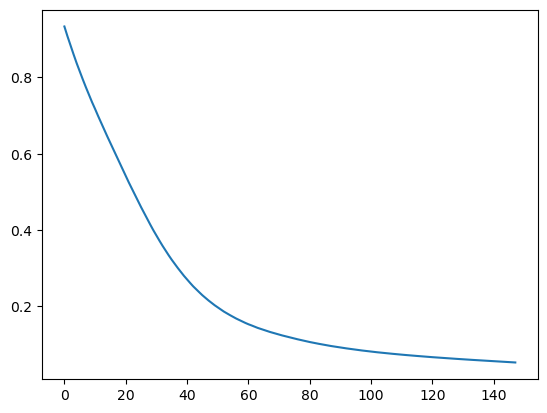

In [26]:
loss_curve = model.loss_curve_
plt.plot(loss_curve)
plt.show()

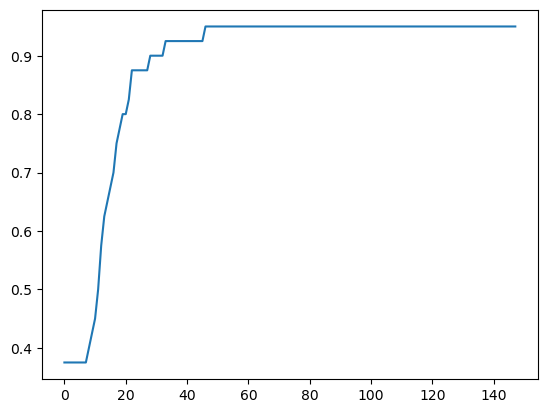

In [27]:
validation_scores = model.validation_scores_
plt.plot(validation_scores)
plt.show()

# Evaluation of the model

In [28]:
# During training
model.score(X_train, y_train)

0.949748743718593

In [29]:
# During testing
model.score(X_test, y_test)

0.9590643274853801

In [31]:
y_hat = model.predict(X_test)

### Confusion Matrix

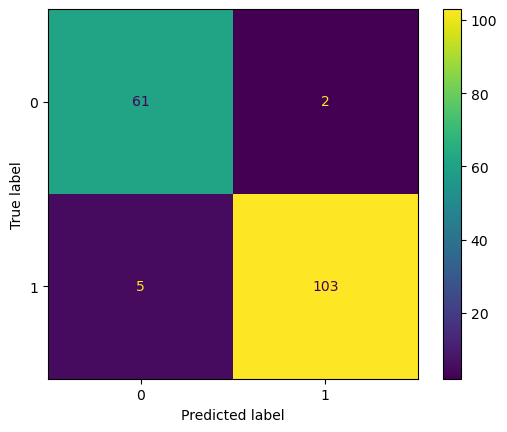

In [33]:
# Confusion Matrix first version with matplotlib.pyplot

cm = confusion_matrix(y_test, y_hat, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

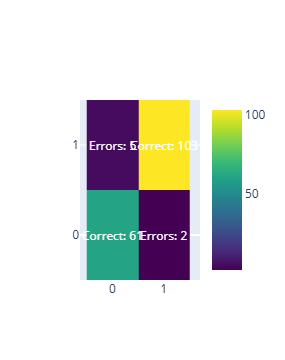

In [34]:
# Confusion Matrix second version with plotly.express

# Create the heatmap trace
heatmap = go.Heatmap(z=cm, x=model.classes_, y=model.classes_, colorscale='Viridis')

# Create the figure and add the heatmap trace
fig = go.Figure(data=[heatmap])

# Add annotations for each cell in the confusion matrix
for i in range(len(cm)):
    for j in range(len(cm[i])):
        if i == j:
            text = f"Correct: {cm[i][j]}"
        else:
            text = f"Errors: {cm[i][j]}"
        fig.add_annotation(
            text=text,
            x=model.classes_[j],
            y=model.classes_[i],
            xref='x',
            yref='y',
            showarrow=False,
            font=dict(color='white')  # Ensure text color is white for better visibility
        )

# Update axis properties
fig.update_xaxes(title_text='Predicted Label', tickmode='array', tickvals=list(range(len(model.classes_))), ticktext=model.classes_)
fig.update_yaxes(title_text='True Label', tickmode='array', tickvals=list(range(len(model.classes_))), ticktext=model.classes_)


# Set the layout to ensure the figure is square
fig.update_layout(
    width=600,  # Set the width of the figure
    height=600  # Set the height of the figure to be equal to the width
)

# Show the figure
fig.show()

##### *As you can see the model has a good accuracy  and is doing well in predicting both classes*